# SciPy
The SciPy package contains various toolboxes dedicated to common issues in scientific computing.

Its different __submodules__ correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc.

It is the core package for scientific routines in Python; it is meant to operate efficiently on numpy arrays, so that numpy and scipy work hand in hand. Scipy’s routines are optimized and tested, and should therefore be used when possible. A user guide and documentation  on all the functions in Scipy can be found online here: https://docs.scipy.org/doc/scipy/reference/index.html 



1) Use the io submodule for saving and loading files:

In [2]:
import numpy as np

# io: the submodule for input/output (saving and loading files):
from scipy import io as spio

### TO DO:
### CREATE A MULTIDIMENSIONAL ARRAY OF YOUR CHOICE USING NUMPY
array = np.array([1,2,4,3])

# saving as a matlab file
spio.savemat('example.mat', {'ar': array})

# TO DO: loading from a matlab file
data = spio.loadmat('example.mat')
print(data['ar'])

[[1 2 4 3]]


2) Use the linalg submodule for linear algebra functions:

In [3]:
#linalg: the submodule for linear algebra
from scipy import linalg

### CREATE A 2x2 NUMPY ARRAY WITH VALUES 1, 2, 3 and 4
matrix = np.array([[1,2],[3,4]])

#find the name of the functions to compute the determinant and inverse of that matrix
#TIP: go to the documentation page of linalg! https://docs.scipy.org/doc/scipy/reference/linalg.html
matrix_determinant = linalg.det(matrix)
matrix_inverse = linalg.inv(matrix)

print(matrix_determinant)
print(matrix_inverse)

-2.0
[[-2.   1. ]
 [ 1.5 -0.5]]


In [4]:
#let's try with another matrix
new_matrix = np.array([[3,2],[6,4]]) # this matrix has a null determinant: can you calculate it by hand?

matrix_determinant = linalg.det(new_matrix)
print(new_matrix)
print(int(matrix_determinant))

# since the determinant is 0, what will happen if we run this next line? uncomment it to see for yourself
# matrix_inverse = linalg.inv(new_matrix)

[[3 2]
 [6 4]]
0


3) Use the stats submodule for statistics

In [7]:
#stats: the submodule for statistics
from scipy import stats

a = np.random.normal(loc=0, scale=1, size=100) 
b = np.random.normal(1, 1, 10)

stats.ttest_ind(a, b)  #how can we interpret these results?
#the t-test indicates if we can reject the null hypothesis (i.e. the series "a" and "b" have the same mean) with a certain p-value
#since the "b" series only has ten points, when you run this cell several times you may sometimes be able to reject the null hypothesis (p<0.01), and sometimes not

TtestResult(statistic=-0.8264004997276831, pvalue=0.4103989246617852, df=108.0)

### Intro to Signal Processing, Sampling and Curve Fitting
In signal processing, sampling is the reduction of a continuous-time signal to a discrete-time signal. Sampling can be done for functions varying in space, time, or any other dimension, and similar results are obtained in two or more dimensions.

For functions that vary with time, let s(t) be a continuous function (or "signal") to be sampled, and let sampling be performed by measuring the value of the continuous function every T seconds, which is called the sampling interval or the sampling period. Then the sampled function is given by the sequence:
s(nT),   for integer values of n.
The sampling frequency or sampling rate, fs, is the average number of samples obtained in one second, thus fs = 1/T. Its units are samples per second or hertz e.g. 48 kHz is 48,000 samples per second.

Reconstructing a continuous function from samples is done by interpolation algorithms.



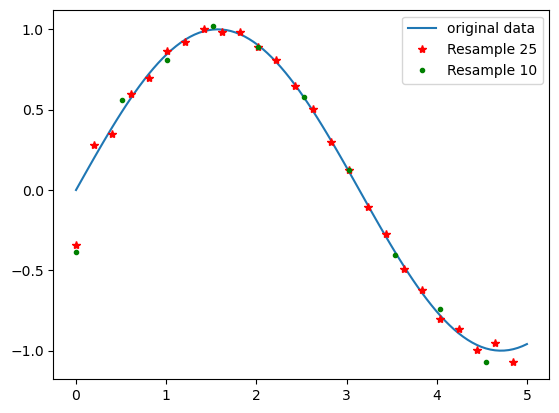

In [10]:
# signal: the submodule for signal processing
from scipy import signal as sig

### TO DO:
### CREATE AN ARRAY WITH 100 VALUES FROM 0 TO 5
time = np.linspace(0,5,100)
data = np.sin(time)

#What do these two lines do?
data_resampled_25 = sig.resample(data, 25)
data_resampled_10 = sig.resample(data, 10)


# TO DO: Let's visualize the original signal and the two resampled signals
#Use a line to plot the original data, and two different markers styles for the resampled data
import matplotlib.pyplot as plt
plt.plot(time,data,label="Original data")
plt.plot(time[::4],data_resampled_25,'r*',label="Resampled on 25 points")
plt.plot(time[::10],data_resampled_10,'g.',label="Resampled on 10 points")
plt.legend()

#Note that for the resampled data has less values, you need to have the same number of values for the "x" axis to plot them
#For example for the data_resampled_25, we keep only 1/4 points of the original "time" array, hence time[::4]

### Linear Interpolation

Linear interpolation is a method of curve fitting using linear polynomials to construct new data points within the range of a discrete set of known data points.
If the two known points are given by the coordinates ($x_0$, $y_0$) and ($x_1, y_1$) the linear interpolant is the straight line between these points. For a value x in the interval ($x_0, x_1$), the value y along the straight line is given from the equation of slopes.
\begin{align}
\frac{y- y_0}{x-x_0} = \frac{y_1-y_0}{x_1-x_0}
\end{align}
Solving the equation for y, gives the formula for linear interpolation in the interval ($x_0, x_1$).
\begin{align}
y = y_0\frac{x_1-x}{x_1-x_0}+ y_1 \frac{x-x0}{x_1-x_0}
\end{align}

Linear interpolation is often used to approximate a value of some function f using two known values of that function at other points.

**_In the context of data analysis, it is useful for fitting a function from experimental data and thus evaluating points where no measure exists._**

[-0.00604811 -0.04760607  0.04594359  0.05221452 -0.04761218  0.00790278
  0.0684332   0.08791945 -0.07700416 -0.00435929]
(10,)


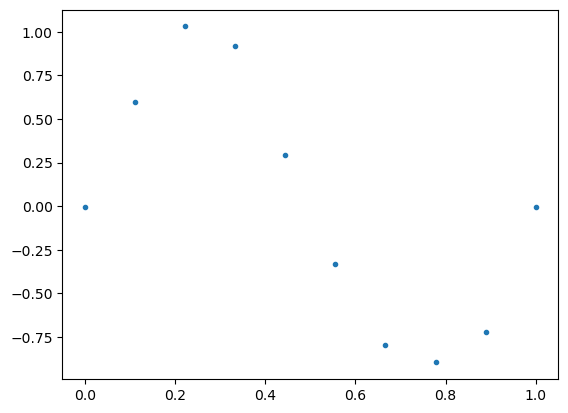

In [11]:
#interpolate: the submodule for interpolation (easy)
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


### TO DO:
### CREATE A NUMPY ARRAY WITH 10 VALUES RANGING FROM 0 TO 1
time_points = np.linspace(0,1,10)

noise = np.random.uniform(-0.1, 0.1, 10)
print(noise)

datapoints = np.sin(2 * np.pi * time_points) + noise
print(datapoints.shape)

plt.figure()
plt.plot(time_points, datapoints, '.')
# points are close to the sin function, but slightly off because of the noise

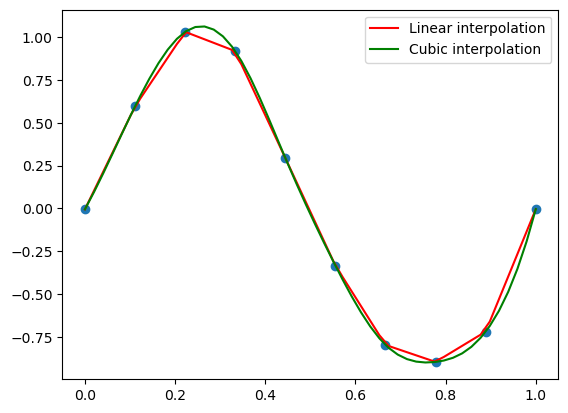

In [12]:
#Now let's interpolate the data over 50 time points
### TO DO:
### CREATE A NUMPY ARRAY WITH 50 VALUES RANGING FROM 0 TO 1
interpolation_time = np.linspace(0,1,50)

#First, we create a linear interpolation function
linear_interp = interp1d(time_points, datapoints)
#TO DO: apply the function to the interpolation_time variable
linear_results = linear_interp(interpolation_time)

#Here, we create a cubic interpolation function
cubic_interp = interp1d(time_points, datapoints, kind='cubic')
#TO DO: apply the function to the interpolation_time variable
cubic_results = cubic_interp(interpolation_time)

#Now, we plot the original data points and the two interpolations
plt.figure()
plt.plot(time_points, datapoints, 'o')
plt.plot(interpolation_time, linear_results, 'r', label='Linear interpolation')
plt.plot(interpolation_time, cubic_results, 'g', label='Cubic interpolation')
plt.legend()

### Curve fitting
Curve fitting is a type of optimization that finds an optimal set of parameters for a defined function that best fits a given set of observations.

Unlike supervised learning, curve fitting requires that you define the function that maps examples of inputs to outputs.

The mapping function, also called the basis function can have any form you like, including a straight line (linear regression), a curved line (polynomial regression), and much more. This provides the flexibility and control to define the form of the curve, where an optimization process is used to find the specific optimal parameters of the function.

The scipy.optimize module provides algorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding.

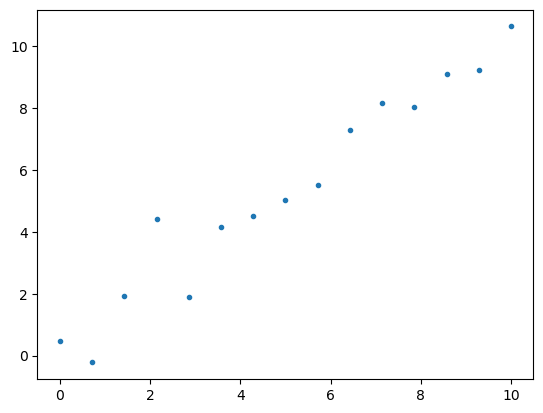

In [17]:
from scipy import optimize

#Let's define our original data, a straigh line with added noise
x_data = np.linspace(0,10,15)
y_data = np.linspace(0,10,15) + np.random.normal(size = 15)

plt.figure()
plt.plot(x_data,y_data,'.')

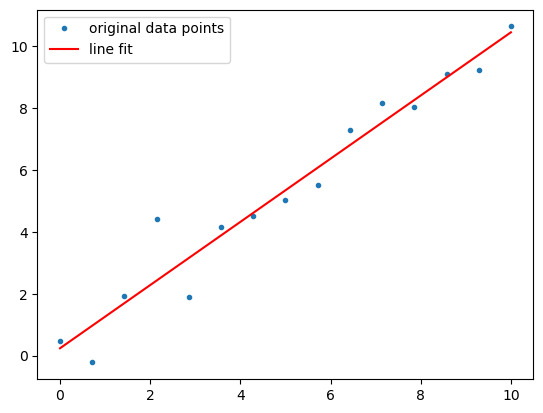

In [18]:
#Let's define a function that we will try to fit to our data
def f(x,a,b):
    return a*x + b

# TO DO: given our function "f" whose first argument is an independent variable (x),
# determine the other arguments (a and b) so that f(x_data) is as close to y_data as possible:
#TIP: use the optimize.curve_fit function
params, params_covariance = optimize.curve_fit(f,x_data,y_data)
optimal_a, optimal_b = params

#Now we apply our function f with our optimal a and b to x_data
line = f(x_data, optimal_a, optimal_b)

#And now we plot our results
plt.figure()
plt.plot(x_data,y_data,'.',label='original data points')
plt.plot(x_data,line,'r',label='line fit')
plt.legend()

Now we will do something similar for a sine plot:

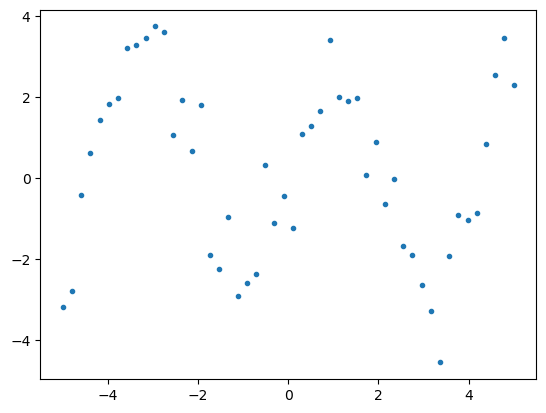

In [19]:
x_data = np.linspace(-5, 5, 50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size = 50)

plt.figure()
plt.plot(x_data,y_data,'.')

The optimal a and b parameters are: (2.8258321871071654, 1.4849713589268045)
The goodness of fit is measured by R2=0.8149045138716524


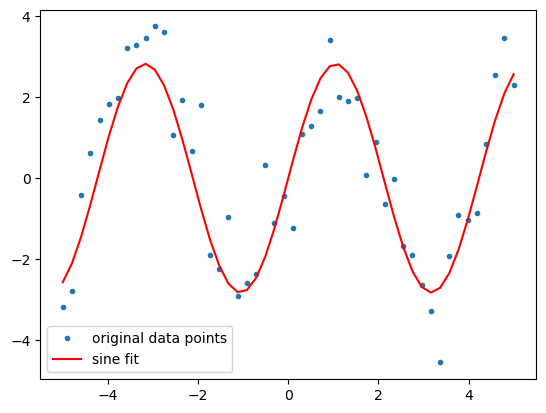

In [23]:
#our points look like they could be approximated by a sin function:
def sin_func(x,a,b):
    return a*np.sin(b*x)

### TO DO:
### FILL IN THE BLANKS! Find the optimal a and b and plot the resulting fitting along with the original data
params, params_covariance = optimize.curve_fit(sin_func,x_data,y_data)
optimal_a, optimal_b = params

sine_opti = sin_func(x_data, optimal_a, optimal_b)

plt.figure()
plt.plot(x_data,y_data,'.',label='original data points')
plt.plot(x_data,sine_opti,'r',label='sine fit')
plt.legend()


### PRINT THE OPTIMIZED PARAMETERS:
# how well did we approximate the values used to create y_data in the first place?
print("The optimal a and b parameters are: "+str((optimal_a, optimal_b)))
residuals = y_data- sine_opti
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)
print("The goodness of fit is measured by R2="+str(r_squared))